In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import scienceplots
plt.style.use(['science', 'notebook'])
plt.rcParams['font.family'] = 'Times New Roman'

In [3]:
T293_det_data = pd.read_excel('data\RI_tungsten.xlsx')
T293_det_data

,R2 / Ω,R3 / Ω,R4 / Ω,A1 / A,A2 / A,R1 / Ω,Unnamed: 6,T / K,R1
0,1,3000,3500,0.0,0.005,1.166667,NaN,NaN,NaN
1,1,3000,3700,0.0,0.022,1.233333,NaN,NaN,NaN
2,1,3000,3800,0.0,0.053,1.266667,NaN,NaN,NaN
3,1,2500,3250,0.0,0.060,1.300000,NaN,NaN,NaN
4,1,3000,4000,NaN,0.080,1.333333,NaN,NaN,NaN
5,1,2240,3200,0.0,0.100,1.428571,NaN,NaN,NaN
6,1,3240,5000,0.0,0.120,1.543210,NaN,NaN,NaN
7,1,3540,6000,0.0,0.140,1.694915,NaN,NaN,NaN
8,1,3670,7000,0.0,0.160,1.907357,NaN,NaN,NaN
9,1,3650,8000,0.0,0.179,2.191781,NaN,NaN,NaN


19


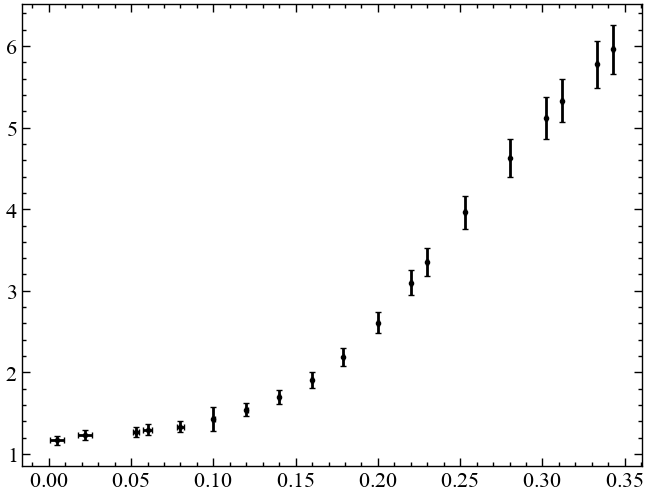

In [4]:
driving_current = T293_det_data.loc[:, 'A2 / A']
resistance = T293_det_data.iloc[:, 5 ]
print(len(driving_current))
current_error = np.array([0.004,0.004,0.002,0.003,0.002,0.001,0.001,
                          0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005])



resistance_errors = resistance * 0.05
resistance_errors[5] = resistance[5] *0.1
resistance_errors[10] = resistance[10] * 0.05
plt.show()
plt.errorbar(driving_current, resistance,  yerr= resistance_errors, 
             xerr =current_error, fmt = '.k',  capsize= 2 )
plt.show()



c:\Users\Gokul\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


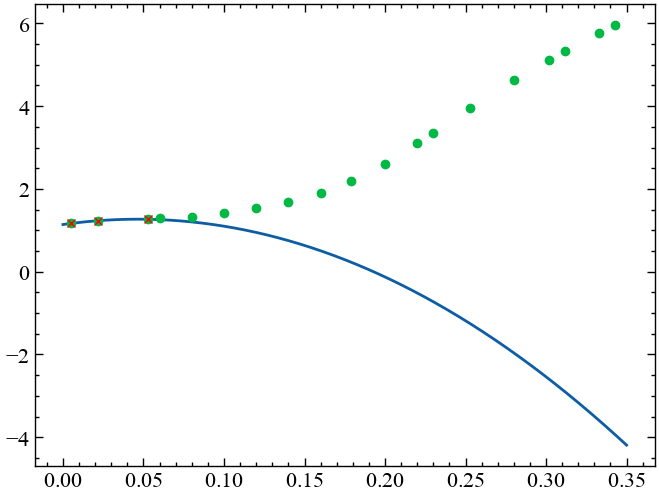

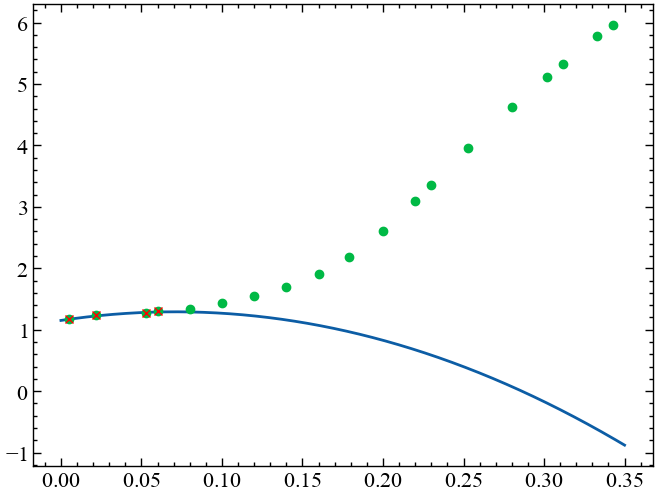

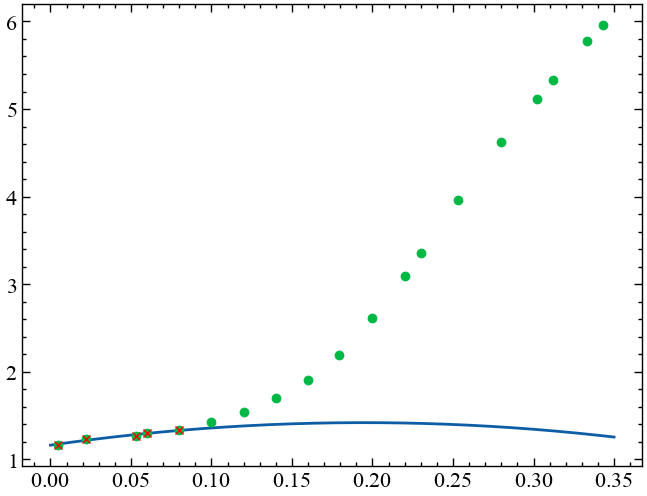

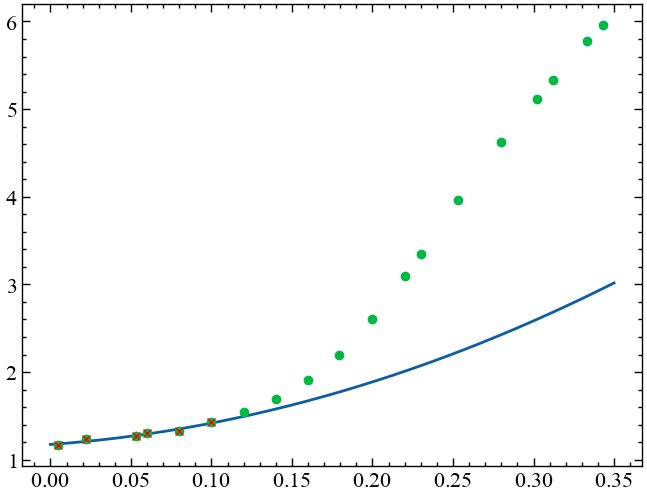

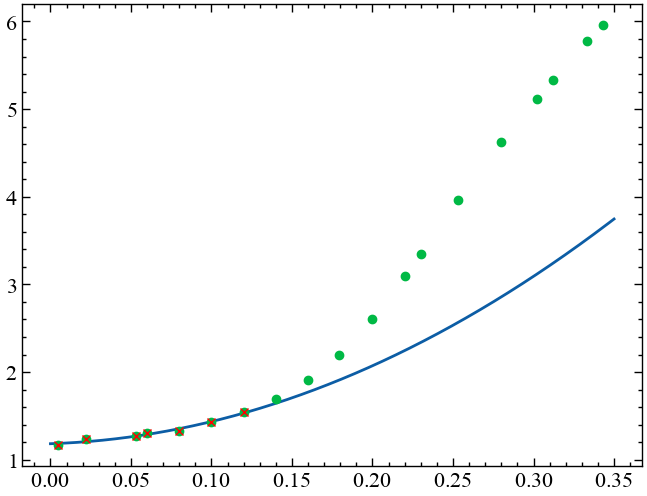

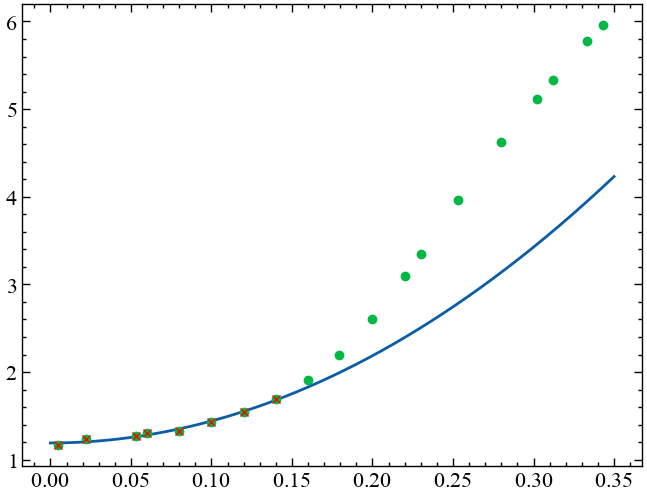

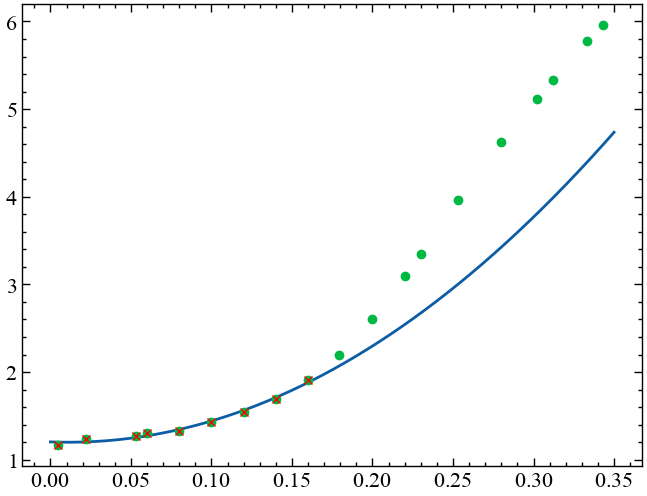

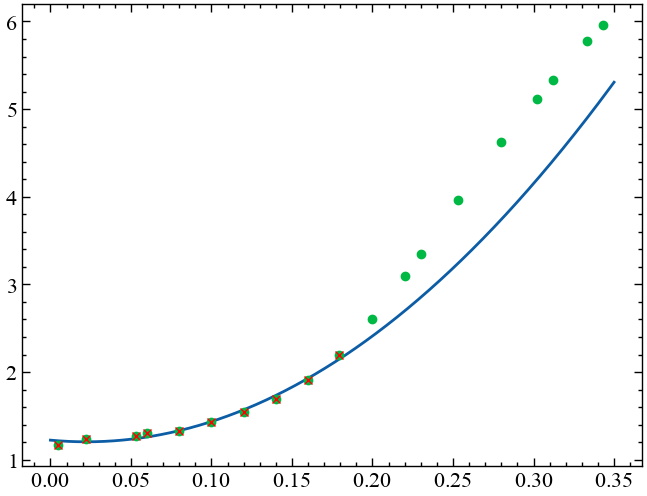

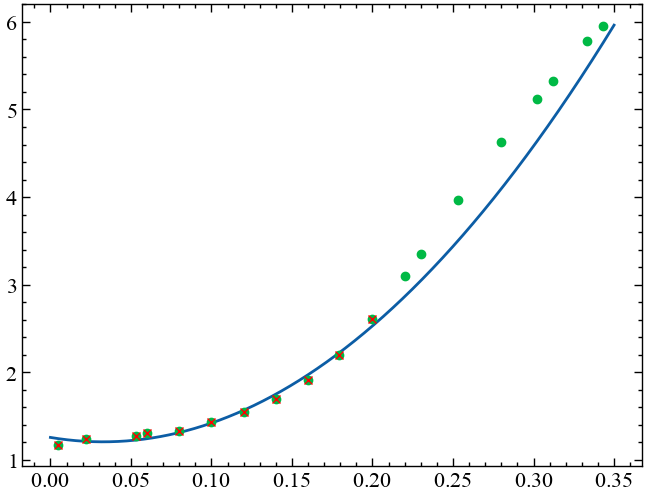

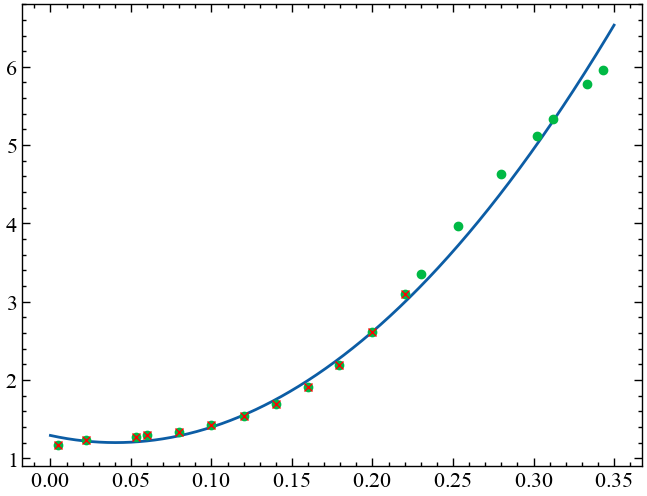

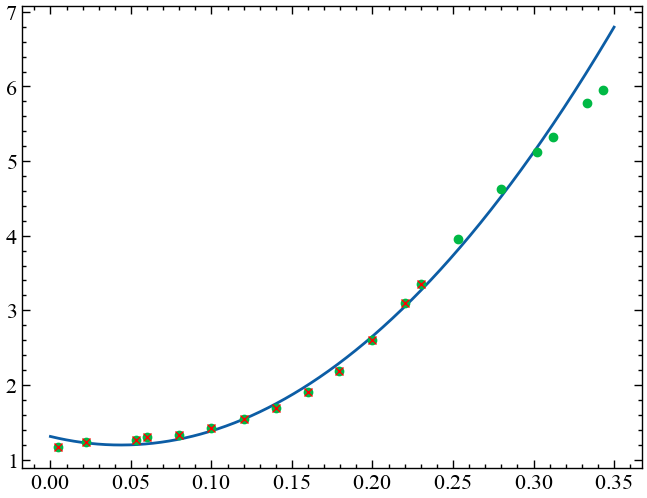

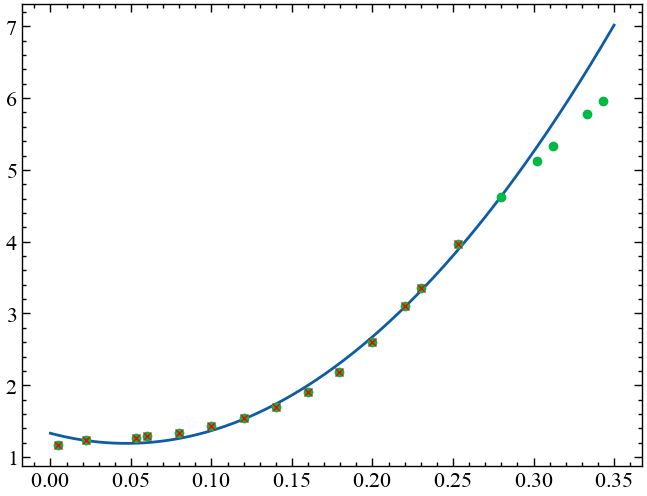

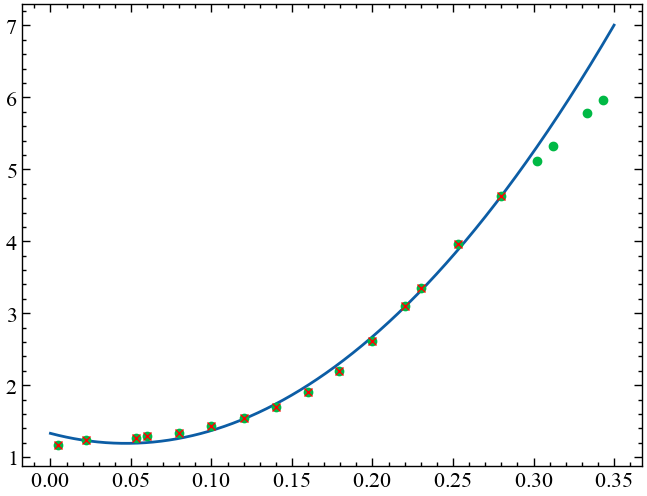

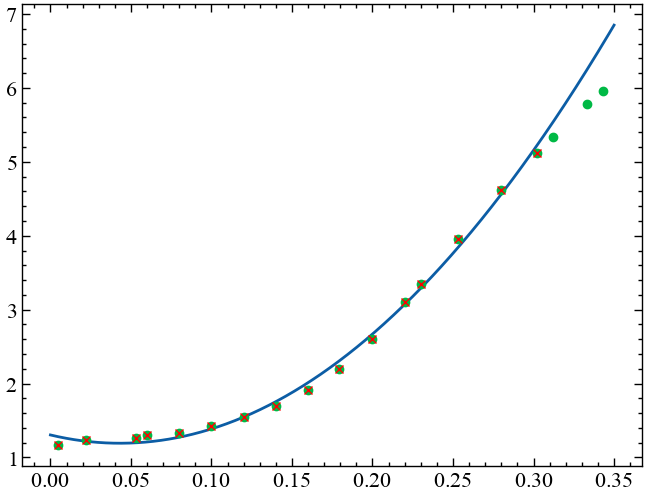

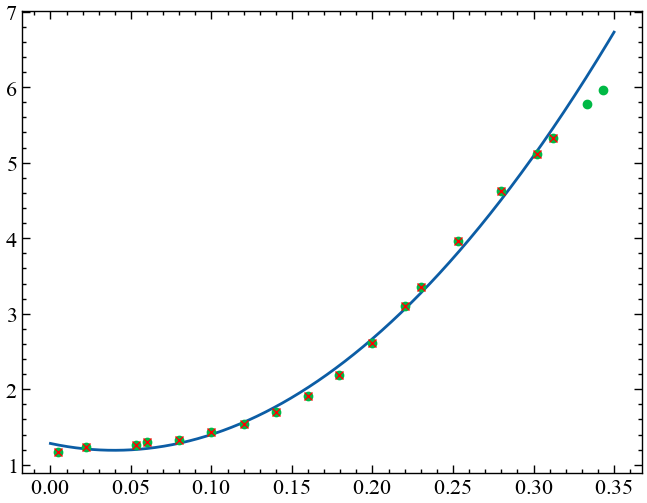

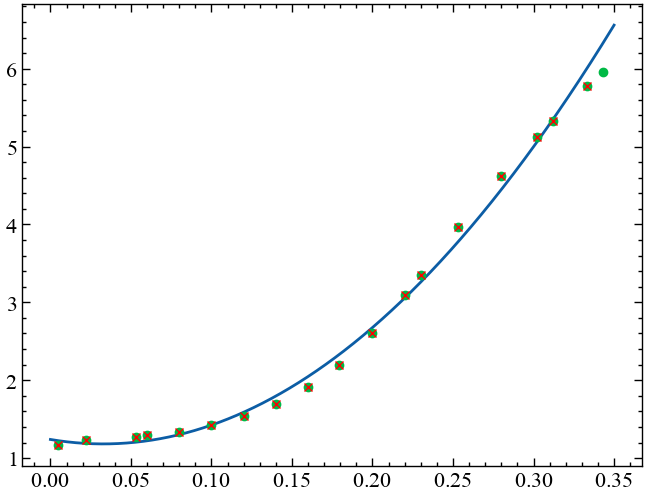

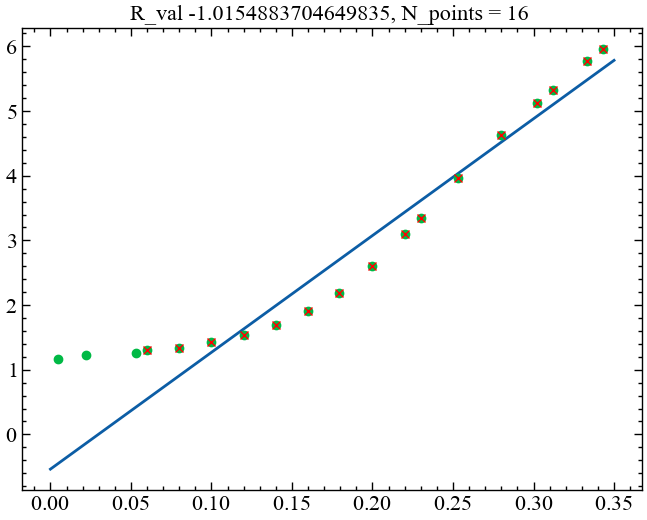

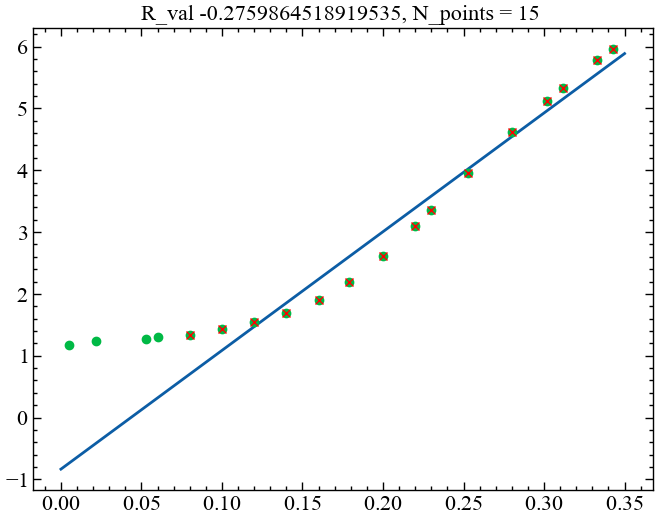

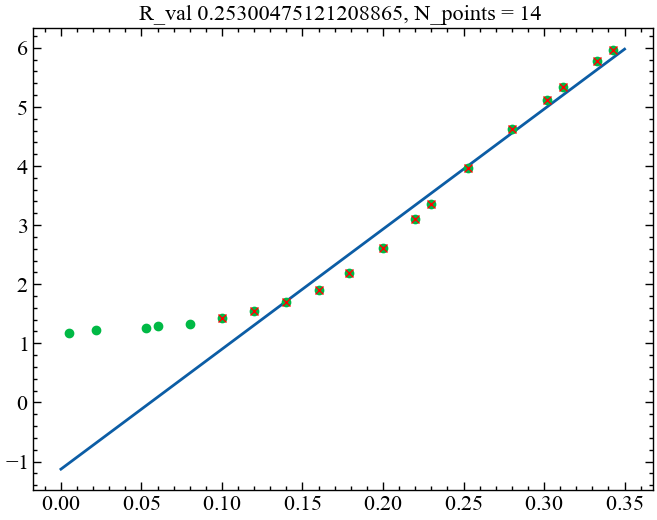

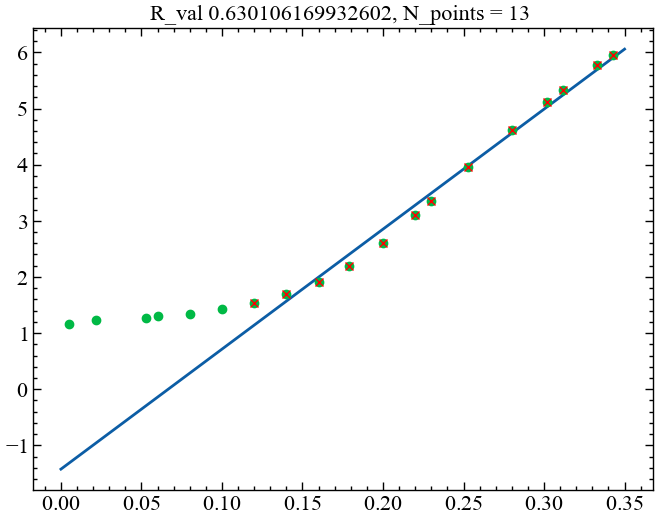

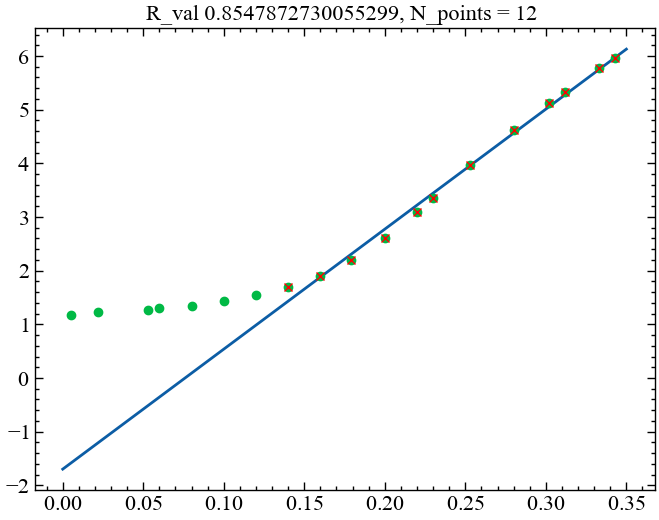

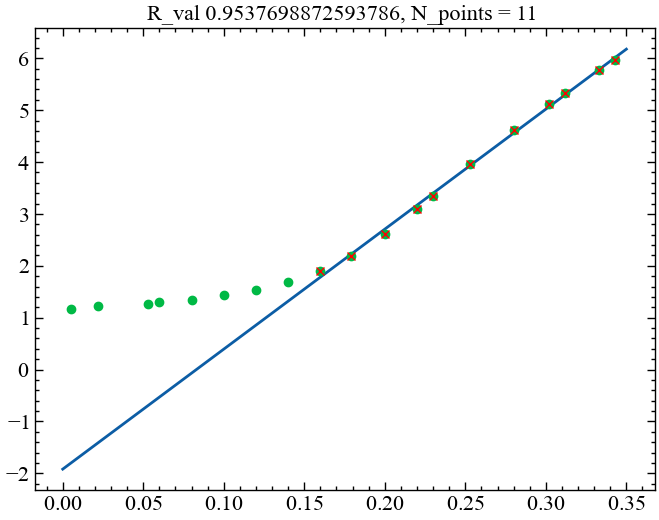

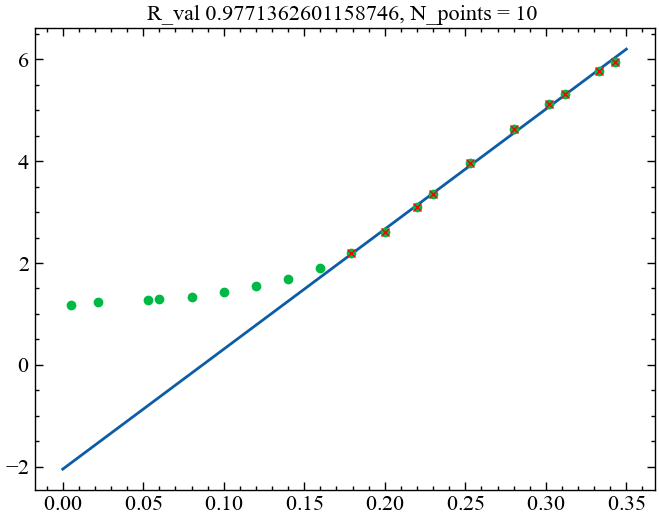

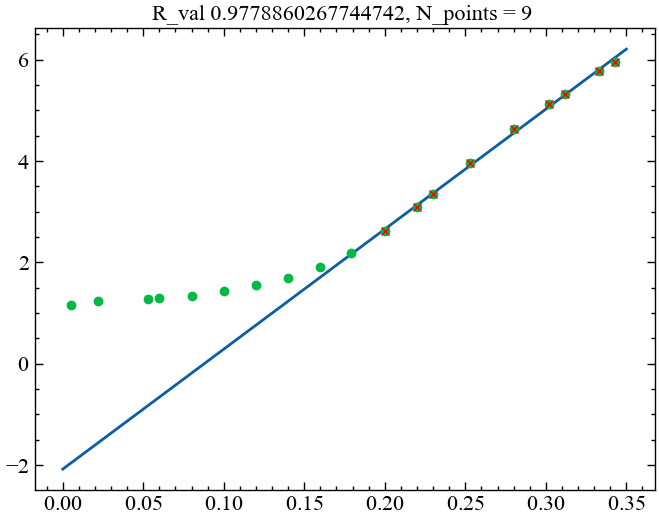

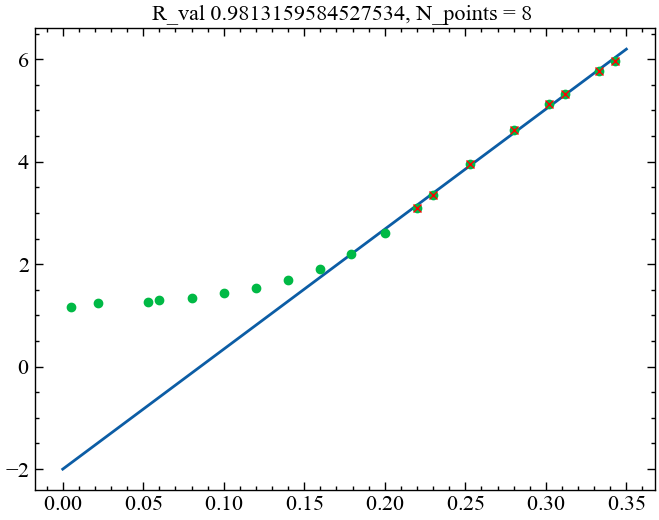

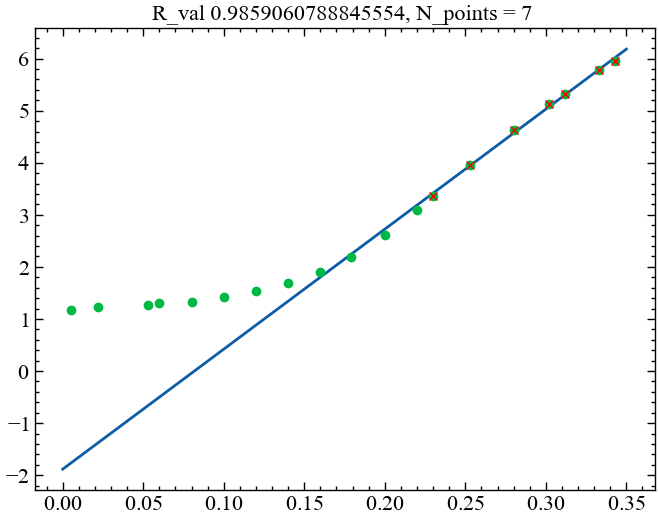

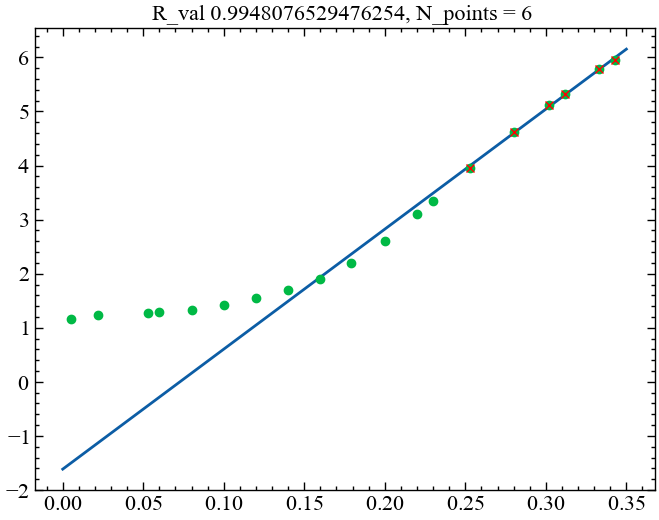

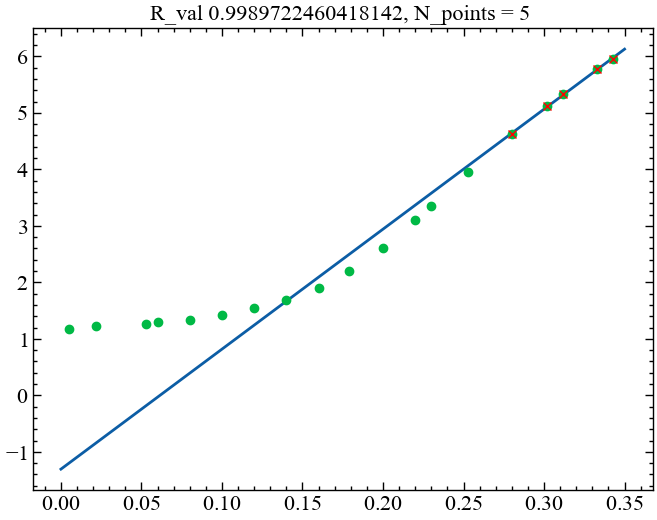

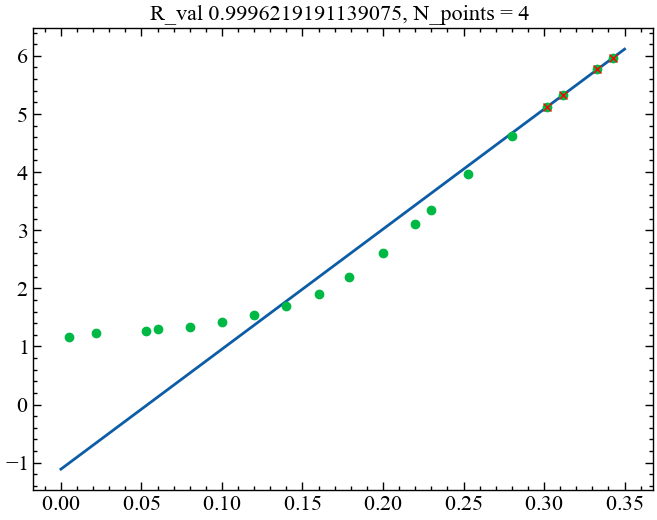

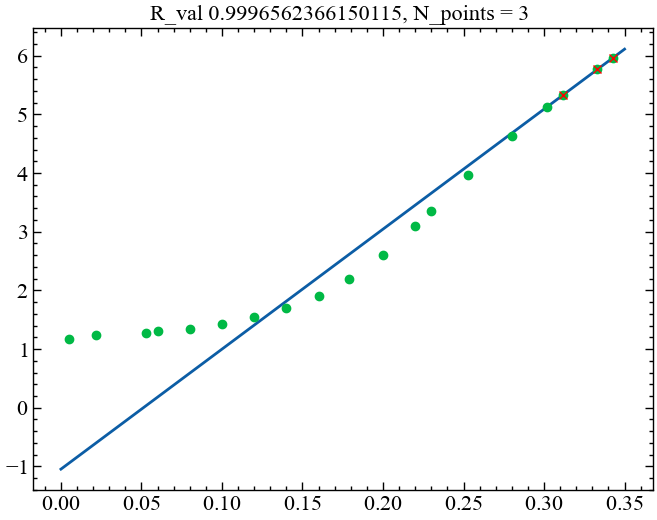

In [5]:
def quadratic(x, a, b ,c):
    return a * x**2 + b*x + c

def lin(x, m, b):
    return m*x + b

def quad_fit(A2, R, cov = False):
    params, covariance = curve_fit(quadratic, A2, R)
    
    if cov == False:
        return params
    else:
        return params, covariance

def lin_fit(A2, R):
    params, covariance = curve_fit(lin, A2, R)
    
    return params
    

def fit_check(params,A2, R, fit_type = 'quadratic'):
    
    if fit_type == 'quadratic':
        R_fit = quadratic(A2, *params)

    else:
        R_fit = lin(A2, *params)

    
    residuals = R - R_fit
    ss_residulas = np.sum(residuals**2)
    ss_total = np.sum(R - np.mean(R)**2)
    r_squared = 1 - ss_residulas
        
    return r_squared

# checking quadratic_fits
R_vals_quad = []
for i in range(3, len(driving_current)):
    params = quad_fit(driving_current[:i], resistance[:i])
    r_val = fit_check(params, driving_current[:i], resistance[:i])
    R_vals_quad.append(r_val)
    
    current_interp = np.linspace(0,0.35,1000)
    resitance_fit = quadratic(current_interp, *params)

    plt.figure()
    plt.plot(current_interp, resitance_fit)
    plt.plot(driving_current, resistance, 'o')
    plt.plot(driving_current[:i], resistance[:i], 'x', color = 'red')
    plt.show()
# checking linear_fits
R_vals_lin = []
for i in range(3, len(driving_current)-2 ):
    params = lin_fit(driving_current[i:], resistance[i:])
    r_val = fit_check(params, driving_current[i:], resistance[i:], 'linear')
    R_vals_lin.append(r_val)
    
    current_interp = np.linspace(0,0.35,1000)
    resitance_fit = lin(current_interp, *params)

    plt.figure()
    plt.title('R_val {r_val}, N_points = {n} '.format(r_val = r_val, n = len(driving_current) - i))
    plt.plot(current_interp, resitance_fit)
    plt.plot(driving_current, resistance, 'o')
    plt.plot(driving_current[i:], resistance[i:],'x', color = 'red')
    plt.show()



10 seems like the quadratic region, found from linear plots

## The money shot

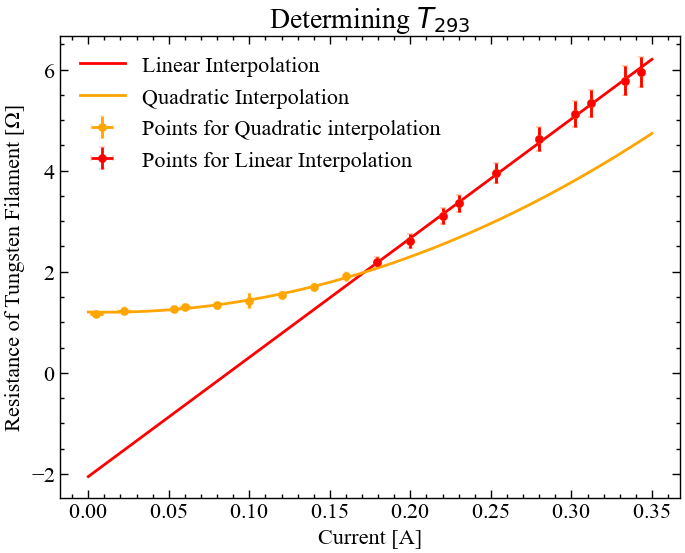

In [6]:
params = lin_fit(driving_current[9:], resistance[9:])
r_val = fit_check(params, driving_current[9:], resistance[9:], 'linear')
current_interp = np.linspace(0,0.35,1000)
resitance_fit = lin(current_interp, *params)

plt.figure()
plt.title( "Determining $T_{293}$", fontsize = 20)

plt.errorbar(driving_current, resistance,  yerr= resistance_errors, 
             xerr =current_error, fmt = 'o',  capsize= 2, mew = 0.2, color = 'orange', 
             label = 'Points for Quadratic interpolation' )

plt.errorbar(driving_current[9:], resistance[9:],yerr= resistance_errors[9:], 
             xerr = current_error[9:], fmt = 'o', color ='red', capsize= 2, alpha = 1,
             mew = 0.2, label = 'Points for Linear Interpolation')


params_q, covariance_q = quad_fit(driving_current[:9], resistance[:9], cov= True)

current_interp_q = np.linspace(0,0.35,1000)
resitance_fit_q = quadratic(current_interp, *params_q)

plt.plot(current_interp, resitance_fit, label = 'Linear Interpolation', color = 'red')
plt.plot(current_interp_q, resitance_fit_q, label = 'Quadratic Interpolation ', color = 'orange')
plt.legend()
plt.ylabel('Resistance of Tungsten Filament [Ω]')
plt.xlabel('Current [A]')
plt.show()


In [7]:
T_293 = params_q[2]
T_uncertainty = np.sqrt(covariance_q[2 ,2])

print('T_293 is {T_293}, +/- {u}'.format(T_293 = T_293, u = T_uncertainty))

T_293 is 1.2038162632103246, +/- 0.025438841331329093


## Room Temprature resitance is deemed to be 1.20 +/- 0.03

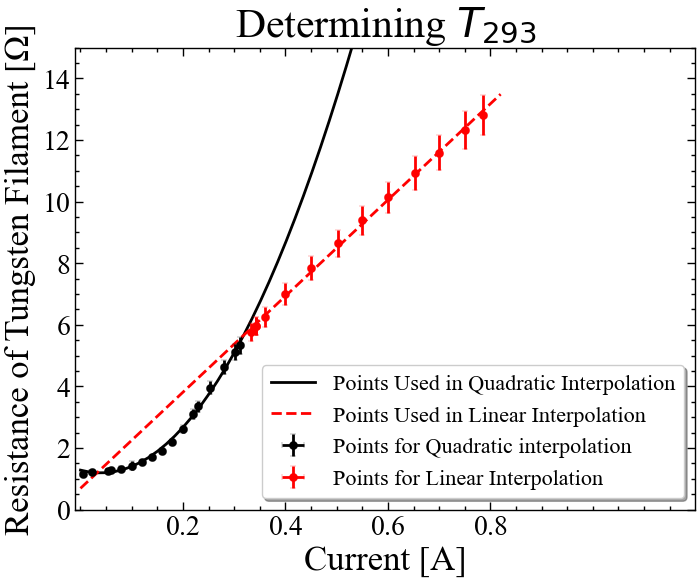

In [84]:
new_data = pd.read_excel('data/resistance_to_temp.xlsx')
current = new_data.loc[:, 'A2 / A']
resistance_more = new_data.iloc[:, 5 ]

current_error_new = current_error = np.array([0.005,0.005,0.003,0.003,0.002,0.002,0.001,
                          0.0001,0.0001,0.0001,0.0001,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,
                          0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,0.0005,])
resistance_errors_more = resistance_more * 0.05
resistance_errors_more[5] = resistance_more[5] *0.1
resistance_errors_more[10] = resistance_more[10] * 0.05



crossing_point = 17

params_quadratic, covariance_quadratic = quad_fit(current[:crossing_point], resistance_more[:crossing_point], cov= True)
params_linear = lin_fit(current[crossing_point:], resistance_more[crossing_point:])
I_q = np.linspace(0,0.82)
R_q = quadratic(I_q, *params_quadratic)
R_l = lin(I_q, *params_linear)



plt.figure()
plt.plot(I_q,R_q,'black', label = 'Points Used in Quadratic Interpolation')
plt.plot(I_q, R_l,'red', linestyle = 'dashed', label = 'Points Used in Linear Interpolation')

plt.errorbar(current[:crossing_point], resistance_more[:crossing_point],  yerr= resistance_errors_more[:crossing_point], 
             xerr =current_error_new[:crossing_point], fmt = 'o',  capsize= 2, mew = 0.2, color = 'black', 
             label = 'Points for Quadratic interpolation' )

plt.errorbar(current[crossing_point:], resistance_more[crossing_point:],yerr= resistance_errors_more[crossing_point:], 
             xerr = current_error_new[crossing_point:], fmt = 'o', color ='red', capsize= 2, alpha = 1,
             mew = 0.2, label = 'Points for Linear Interpolation')

plt.legend(loc = 'lower right', frameon = True, fancybox = True, framealpha = 1, shadow = True)
plt.title( "Determining $T_{293}$", fontsize = 30)
plt.ylim(0,15)
plt.ylabel('Resistance of Tungsten Filament [Ω]', fontsize = 25)
plt.xlabel('Current [A]', fontsize = 25)
plt.xticks(np.arange(0.2, 1.0, 0.2), fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(-0.01, 1.2)
plt.show()


In [62]:
T_293_better = params_quadratic[2]
T_uncertainty_better = np.sqrt(covariance_quadratic[2 ,2])

print('T_293 is {T_293}, +/- {u}'.format(T_293 = T_293_better, u = T_uncertainty_better))

T_293 is 1.2818299994749685, +/- 0.0643979274973523


### $T_{293}$ = 1.28 +/- 0.06